In [390]:
#Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay

In [391]:
#Load the dataset
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [392]:
#Description about the dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [393]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [394]:
#shape of the data
iris.data.shape

(150, 4)

In [395]:
#Feature names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [396]:
#shape of the target
iris.target.shape

(150,)

In [397]:
#Adjust the data in data frame
iris_df = pd.DataFrame(data= iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [398]:
#Finding null values in dataset
iris_df.isna()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
145,False,False,False,False
146,False,False,False,False
147,False,False,False,False
148,False,False,False,False


In [399]:
#Counting null values in dataset
null_counts = iris_df.isna().sum()
print(null_counts)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [400]:
#Appending Class and Species to data frame
species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')

iris['species'] = species
iris_df['class'] = iris.target
iris_df['species'] = species
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


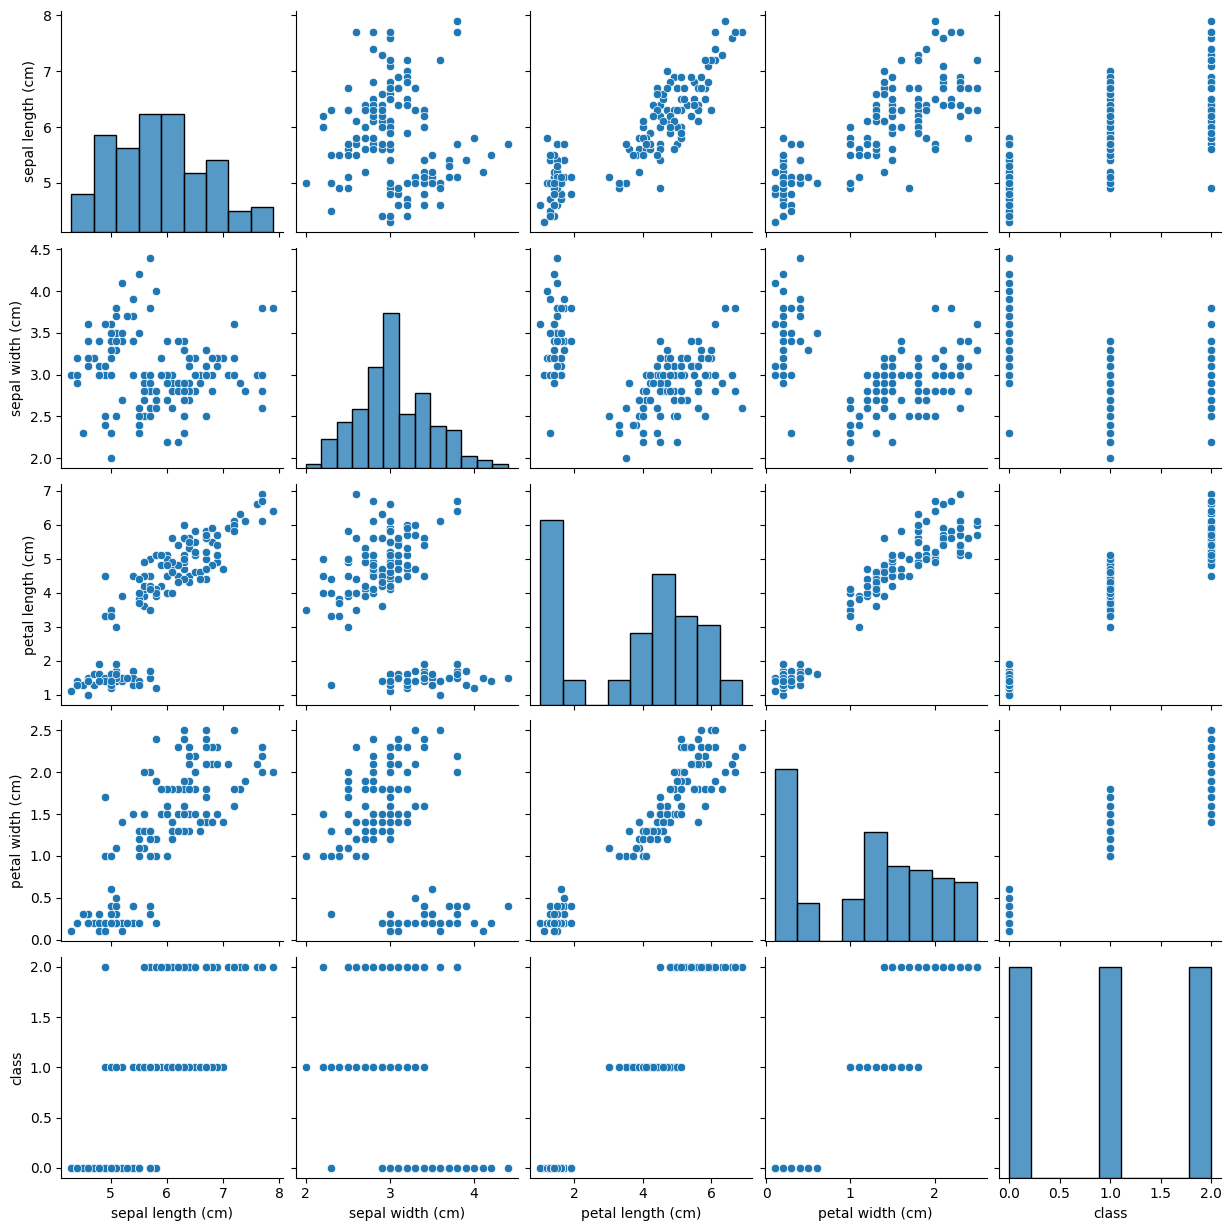

In [401]:
#Data visualization of features with each other feature
sns.pairplot(iris_df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

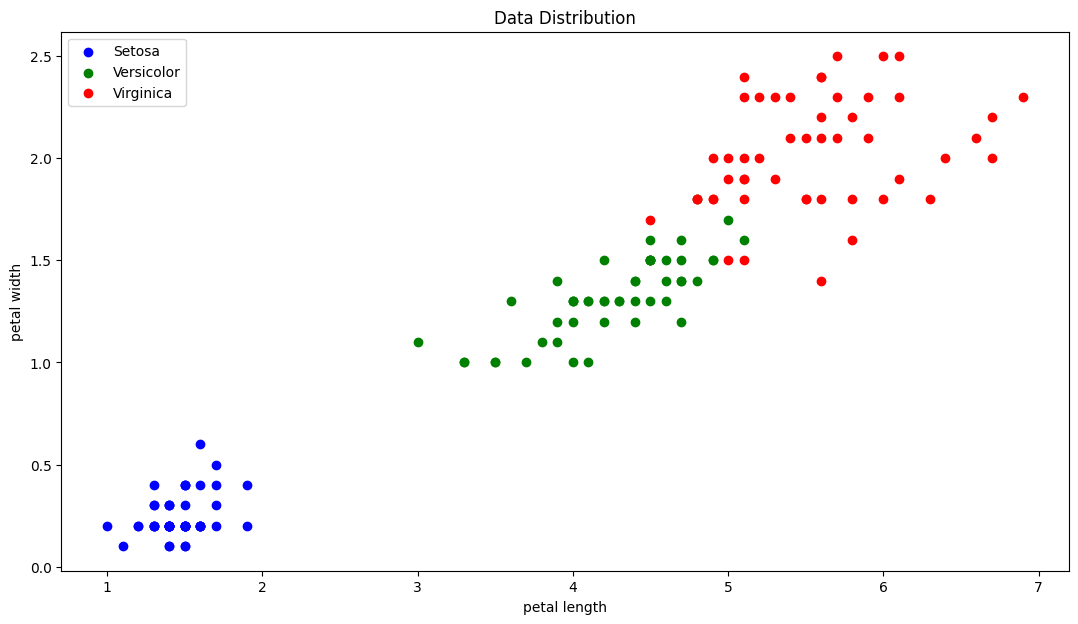

In [402]:
#Using petal length and petal width for easy visualization
X = iris.data[:, [2, 3]]
y = iris.target

# adjusting the length and width of plot
plt.figure(figsize=(13,7))

plt.scatter(X[y == 0,0], X[y == 0,1], label="Setosa", facecolor="blue")
plt.scatter(X[y == 1,0], X[y == 1,1], label="Versicolor", facecolor="green")
plt.scatter(X[y == 2,0], X[y == 2,1], label="Virginica", facecolor="red")
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Data Distribution')
plt.legend()
plt.show

In [403]:
# Create common SVM model for different kernels using k-fold cross validation
def KernelWithMetrics(svm_clf):

    # Number of folds defined for k-fold.
    k = 5
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Initialize a list to store the accuracy scores for each fold
    accuracy_scores = []

    # Iterate over each fold
    for train_index, test_index in kf.split(X):
        # Split the data into train and test sets for this fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        # Train the classifier on the training data
        svm_clf.fit(X_train, y_train)

        # Predict the labels for the test data
        y_pred = svm_clf.predict(X_test)

        # Calculate the accuracy score for this fold and append to the list
        accuracy_scores.append(accuracy_score(y_test, y_pred))

    # Print the accuracy scores for each fold
    print("Cross validation scores for each fold:", accuracy_scores)

    # Calculate and print the mean accuracy across all folds
    mean_accuracy = sum(accuracy_scores) / k

    print("Mean accuracy:", mean_accuracy)

    print(classification_report(y_test, y_pred))

    # printing the confusion matrix
    c_matrix = metrics.confusion_matrix(y_test, y_pred)
    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(c_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()
    print(c_matrix)

Cross validation scores for each fold: [1.0, 0.9666666666666667, 1.0, 0.9333333333333333, 0.9333333333333333]
Mean accuracy: 0.9666666666666668
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.82      0.90        11
           2       0.86      1.00      0.92        12

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



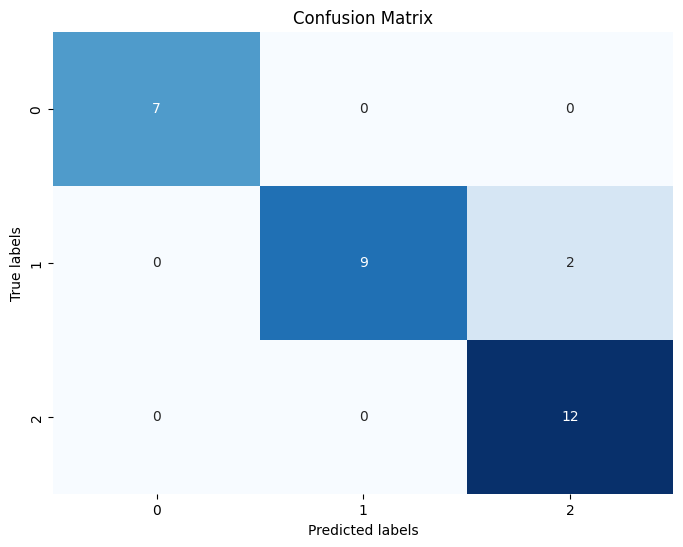

[[ 7  0  0]
 [ 0  9  2]
 [ 0  0 12]]


In [404]:
# Metrics with Linear Kernel
svm_linear = svm.SVC(kernel = 'linear', C=0.75)
KernelWithMetrics(svm_linear)

Cross validation scores for each fold: [1.0, 0.9666666666666667, 1.0, 0.9333333333333333, 0.9333333333333333]
Mean accuracy: 0.9666666666666668
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.82      0.90        11
           2       0.86      1.00      0.92        12

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



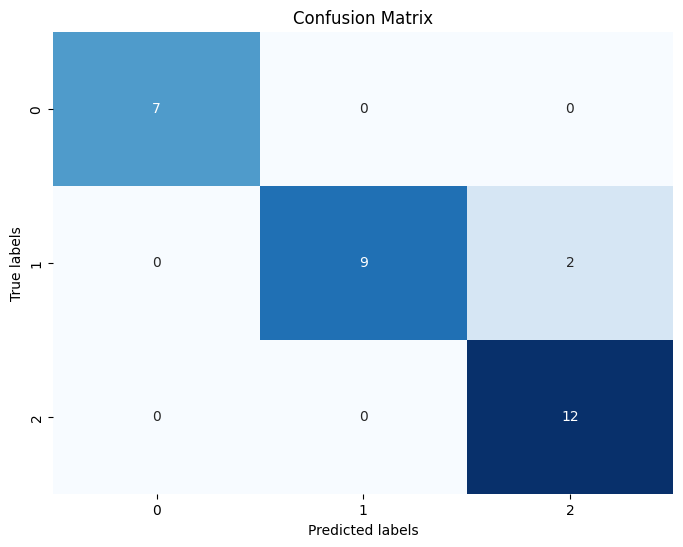

[[ 7  0  0]
 [ 0  9  2]
 [ 0  0 12]]


In [405]:
# Metrics with rbf Kernel
svm_rbf = svm.SVC(kernel = 'rbf', gamma=0.7, C=0.75)
KernelWithMetrics(svm_rbf)

Cross validation scores for each fold: [0.1, 0.03333333333333333, 0.0, 0.03333333333333333, 0.23333333333333334]
Mean accuracy: 0.08
              precision    recall  f1-score   support

           0       0.23      1.00      0.38         7
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        12

    accuracy                           0.23        30
   macro avg       0.08      0.33      0.13        30
weighted avg       0.05      0.23      0.09        30



c:\Program Files\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


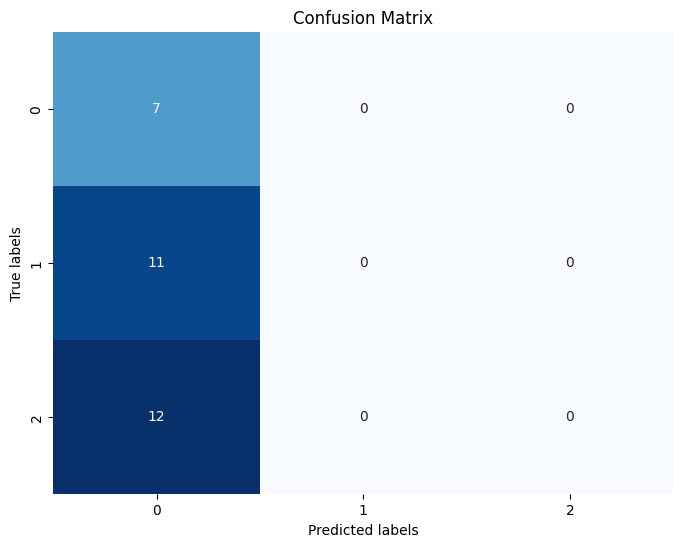

[[ 7  0  0]
 [11  0  0]
 [12  0  0]]


In [406]:
# Metrics with sigmoid Kernel
svm_sigmoid = svm.SVC(kernel = 'sigmoid')
KernelWithMetrics(svm_sigmoid)

Cross validation scores for each fold: [0.9666666666666667, 0.9666666666666667, 1.0, 0.9, 0.9333333333333333]
Mean accuracy: 0.9533333333333334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.82      0.90        11
           2       0.86      1.00      0.92        12

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



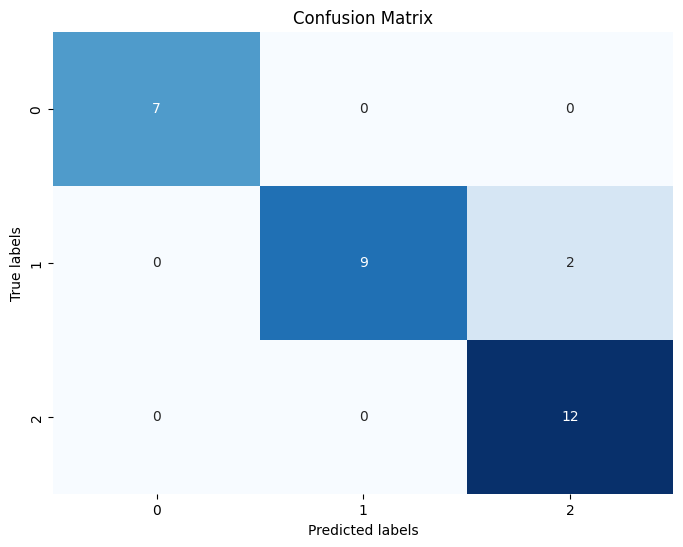

[[ 7  0  0]
 [ 0  9  2]
 [ 0  0 12]]


In [407]:
# Metrics with Polynomial degree 3 Kernel
svm_poly3 = svm.SVC(kernel = 'poly', degree = 3, gamma="auto", C=0.75)
KernelWithMetrics(svm_poly3)

Cross validation scores for each fold: [1.0, 0.9666666666666667, 1.0, 0.9, 0.9333333333333333]
Mean accuracy: 0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.82      0.90        11
           2       0.86      1.00      0.92        12

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



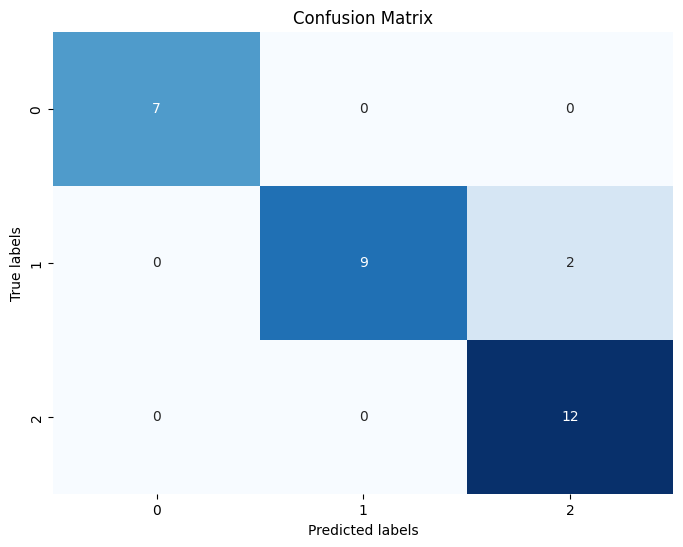

[[ 7  0  0]
 [ 0  9  2]
 [ 0  0 12]]


In [408]:
# Metrics with Polynomial degree 4 Kernel
svm_poly4 = svm.SVC(kernel = 'poly', degree = 4, gamma="auto", C=0.75)
KernelWithMetrics(svm_poly4)

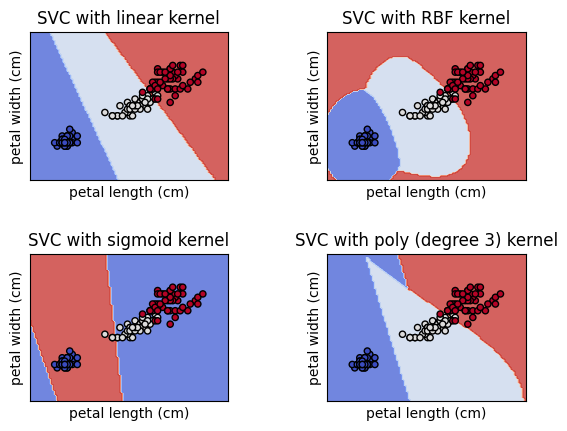

In [409]:
#SVM Classification using different kernels
C = 0.75 # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="sigmoid"),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "SVC with RBF kernel",
    "SVC with sigmoid kernel",
    "SVC with poly (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[2],
        ylabel=iris.feature_names[3],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()